In [1]:
run instagram_poster

In [2]:
import re
import yaml
from datetime import date
from markdown2 import markdown
from mdplain import plain
from pathlib import Path

places = []
taste_labels = ["Do Not Recommend", "Something Going For It", "Good", "Phenomenal"]
taste_labels_short = ["dnr", "sgfi", "good", "phenomenal"]

def rating_to_formatting(rating, rating_labels):
    return rating_labels[rating]
def rating_html(rating, rating_labels):
    return "&nbsp;".join(
        [
            f'<span style="color: {color if rating == ix else faded_color}" aria-hidden="{"false" if rating == ix else "true"}">{label}</span>'
            for ix, (label, color) in enumerate(zip(rating_labels, rating_colors))
        ]
    )
def suffix(d):
    return "th" if 11 <= d <= 13 else {1: "st", 2: "nd", 3: "rd"}.get(d % 10, "th")
def custom_strftime(format_, t):
    return t.strftime(format_).replace("{S}", str(t.day) + suffix(t.day))
def format_visited(visited):
    return custom_strftime("{S} %B %Y", visited)
def format_blurb(md):
    return " ".join(plain(re.sub(r"\s+", " ", md.strip())).split(" ")[:50]) + "..."
    
for place_md in Path("../places").glob("*.md"):
    try: 
        slug = place_md.parts[-1][:-3]
        relative_url = f"/places/{slug}/"
        with open(place_md) as f:
            _, frontmatter, md = f.read().split("---", 2)
        meta = yaml.load(frontmatter, Loader=yaml.Loader)
        meta["url"] = relative_url
        meta["slug"] = slug
        visited = date.fromisoformat(meta["visited"])
        meta["visited_display"] = format_visited(visited)
        meta["review_age"] = (date.today() - visited).days
        meta["taste_label"] = rating_to_formatting(meta["taste"], taste_labels)
        meta["taste_label_short"] = rating_to_formatting(meta["taste"], taste_labels_short)
        meta["blurb"] = format_blurb(md)

        places.append(meta)

    except Exception as e:
        print(place_md.name, e)


In [3]:
def toggle_instagram_published(file_path):
    with open(file_path, 'r') as file:
        content = file.read()

    pattern = r'(instagram_published:\s*)(True|False)'

    def toggle_match(match):
        current_value = match.group(2)
        new_value = 'False' if current_value == 'True' else 'True'
        return match.group(1) + new_value 

    new_content, n = re.subn(pattern, toggle_match, content)
    if n > 0:
        with open(file_path, 'w') as file:
            file.write(new_content)
    
    

In [4]:
places = sorted(places, key=lambda x: -x['review_age'])
places = [p for p in places if p['instagram_published'] is False]
places_to_update = places[:5]
[p['name'] for p in places_to_update]

['Shinmai',
 'Golden Lotus',
 "Yammy's Café & Deli",
 "Cafe Eritrea D'Afrique",
 'Dela Curo Curry']

In [5]:
credentials_file_path = 'credentials.json'
bot = InstagramBot(credentials_file_path)
bot.login()
for place in places_to_update:
    bot.upload_post(place)
    filepath = Path(".." + place['url'][:-1] + ".md")
    toggle_instagram_published(filepath)
    sleep(120 * random())


Message: 
Stacktrace:
#0 0x5b7b0cec3dc3 <unknown>
#1 0x5b7b0cbb24e7 <unknown>
#2 0x5b7b0cbfd35d <unknown>
#3 0x5b7b0cbfd411 <unknown>
#4 0x5b7b0cc40774 <unknown>
#5 0x5b7b0cc1f47d <unknown>
#6 0x5b7b0cc3dc29 <unknown>
#7 0x5b7b0cc1f1f3 <unknown>
#8 0x5b7b0cbf028a <unknown>
#9 0x5b7b0cbf0c5e <unknown>
#10 0x5b7b0ce880eb <unknown>
#11 0x5b7b0ce8c03b <unknown>
#12 0x5b7b0ce74201 <unknown>
#13 0x5b7b0ce8cba2 <unknown>
#14 0x5b7b0ce590bf <unknown>
#15 0x5b7b0ceb2f18 <unknown>
#16 0x5b7b0ceb30f0 <unknown>
#17 0x5b7b0cec2f14 <unknown>
#18 0x7057fb894ac3 <unknown>



StaleElementReferenceException: Message: stale element reference: stale element not found in the current frame
  (Session info: chrome=124.0.6367.201)
Stacktrace:
#0 0x5b7b0cec3dc3 <unknown>
#1 0x5b7b0cbb24e7 <unknown>
#2 0x5b7b0cbb7a9c <unknown>
#3 0x5b7b0cbb97ef <unknown>
#4 0x5b7b0cbb987c <unknown>
#5 0x5b7b0cbfdeaf <unknown>
#6 0x5b7b0cbfdf63 <unknown>
#7 0x5b7b0cbf4cde <unknown>
#8 0x5b7b0cc1f452 <unknown>
#9 0x5b7b0cbf1b98 <unknown>
#10 0x5b7b0cc1f61e <unknown>
#11 0x5b7b0cc3dc29 <unknown>
#12 0x5b7b0cc1f1f3 <unknown>
#13 0x5b7b0cbf028a <unknown>
#14 0x5b7b0cbf0c5e <unknown>
#15 0x5b7b0ce880eb <unknown>
#16 0x5b7b0ce8c03b <unknown>
#17 0x5b7b0ce74201 <unknown>
#18 0x5b7b0ce8cba2 <unknown>
#19 0x5b7b0ce590bf <unknown>
#20 0x5b7b0ceb2f18 <unknown>
#21 0x5b7b0ceb30f0 <unknown>
#22 0x5b7b0cec2f14 <unknown>
#23 0x7057fb894ac3 <unknown>


In [266]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
from pathlib import Path
import random

class ImageGenerator:
    def __init__(self, place, font_path="comic_sans.ttf", logo_font_path="emilyscandy.ttf"):
        self.place = place
        self.font_path = font_path
        self.logo_font_path = logo_font_path
        self.image_path = Path(f"../raw/food/{place['slug']}.jpg")
        self.img = Image.open(self.image_path)
        self.img = self.crop(self.img)
        self.draw = ImageDraw.Draw(self.img)
        self.img_height = self.img.size[1]
        self.margin = self.img_height // 20

    def crop(self, img):
        width, height = img.size
        left = (width - height) / 2
        right = (width + height) / 2
        img = img.crop((left, 0, right, height))
        return img

    def plot_img(self):
        plt.figure(figsize=(5, 5))
        plt.imshow(self.img)
        plt.axis("off")
        plt.show()

    def find_optimal_font_size(self, text, width, margin):
        font_size = 1
        font = ImageFont.truetype(self.font_path, font_size)
        while self.draw.textbbox((0, 0), text, font=font)[2] < width - margin * 2:
            font_size += 1
            font = ImageFont.truetype(self.font_path, font_size)
        font_size -= 1
        return ImageFont.truetype(self.font_path, font_size)

    def add_text_with_thick_outline(self, position, text, font, text_color, outline_color, thickness):
        x, y = position
        for offset in range(-thickness, thickness + 1):
            self.draw.text((x + offset, y + offset), text, font=font, fill=outline_color)
            self.draw.text((x + offset, y - offset), text, font=font, fill=outline_color)
            self.draw.text((x - offset, y + offset), text, font=font, fill=outline_color)
            self.draw.text((x - offset, y - offset), text, font=font, fill=outline_color)
        self.draw.text(position, text, font=font, fill=text_color)

    def add_logo(self):
        logo_text_small = "Vegans In Love with Food"
        logo_text_large = "V.I.L.F"
        
        logo_text_small_size = self.img_height // 15
        logo_text_large_size = self.img_height // 7

        logo_font_small = ImageFont.truetype(self.logo_font_path, logo_text_small_size)
        logo_font_large = ImageFont.truetype(self.logo_font_path, logo_text_large_size)
        
        box_color = "#750395"
        
        box_top_left = (0, self.img_height - logo_text_large_size - logo_text_small_size - self.margin / 4)
        box_bottom_right = (logo_font_large.getbbox(logo_text_large)[2] + self.margin * 3 / 2, self.img_height)
        self.draw.rectangle([box_top_left, box_bottom_right], fill=box_color)
        
        box_top_left = (0, self.img_height - logo_text_small_size - self.margin / 2)
        box_bottom_right = (logo_font_small.getbbox(logo_text_small)[2] + self.margin, self.img_height)
        self.draw.rectangle([box_top_left, box_bottom_right], fill=box_color)
        
        self.draw.text((self.margin / 2, self.img_height - logo_text_small_size - self.margin / 2), logo_text_small, font=logo_font_small, fill="white")
        self.draw.text((self.margin, self.img_height - logo_text_large_size - logo_text_small_size - self.margin / 2), logo_text_large, font=logo_font_large, fill="white")

    def add_name_and_area(self):
        name = self.place['name']
        area = self.place['area']
        primary_color = ["#ef422b", "#efa72b", "#32af2d", "#2b9aef"][self.place['taste']]
        secondary_color = "black"
        
        font_name = self.find_optimal_font_size(name, self.img_height, self.margin)
        text_width, text_height = font_name.getbbox(name)[2:]
        outline_thickness = font_name.size // 13
        
        self.add_text_with_thick_outline((self.margin, 0), name, font_name, secondary_color, primary_color, outline_thickness)
        
        font_area = self.find_optimal_font_size(area, self.img_height / 2, self.margin)
        self.add_text_with_thick_outline((self.img_height / 2, text_height), area, font_area, primary_color, secondary_color, outline_thickness)

    def add_little_guy(self):
        guy_image = Image.open(f"{self.place['taste_label_short']}.png").convert("RGBA")
        guy_image = guy_image.crop(guy_image.getbbox())
        resize_proportion = (self.img_height // (3/2)) / guy_image.size[1]
        new_width, new_height = int(resize_proportion*guy_image.size[0]), int(resize_proportion*guy_image.size[1])
        guy_image = guy_image.resize((new_width,new_height))
        self.img.paste(guy_image,(self.img_height - guy_image.size[0], self.img_height - guy_image.size[1]), guy_image)
    
    def generate_image(self):
        self.add_logo()
        self.add_name_and_area()
        self.add_little_guy()
        return self.img

    def save_image(self, filepath):
        image.save(filepath)


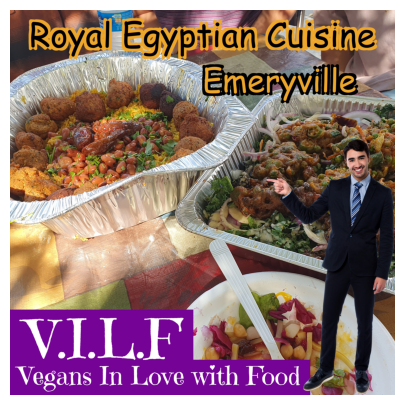

In [271]:
place = places[26]

image_gen = ImageGenerator(place)
image = image_gen.generate_image()
image_gen.plot_img()

In [272]:
image.save("tmp.jpg")

In [262]:
from copy import copy
image_copy = copy(image)

In [263]:
place

{'name': 'Spoon Korean Bistro',
 'cuisine': 'Korean',
 'address': '933 Ashby Ave',
 'area': 'South Berkeley',
 'lat': 37.8516611,
 'lon': -122.2898556,
 'phone': '+15107049555',
 'menu': 'https://www.spoonashby.com/_files/ugd/a06ab3_e2d19efc4fa143bc9263fd60a8f50a09.pdf',
 'drinks': False,
 'visited': '2022-10-26',
 'taste': 1,
 'value': 2,
 'instagram_published': False,
 'url': '/places/spoon-korean-bistro/',
 'slug': 'spoon-korean-bistro',
 'visited_display': '26th October 2022',
 'review_age': 637,
 'taste_label': 'Something Going For It',
 'taste_label_short': 'sgfi',
 'blurb': 'This place has a ton of vegan options, pretty good to go to with a bunch of people. The bibimbap was a bit whatever but definitely a lot of yums for the various pancakes, noodle soups, and glazed potatoes. Mains are around $20 after tips and tax....'}

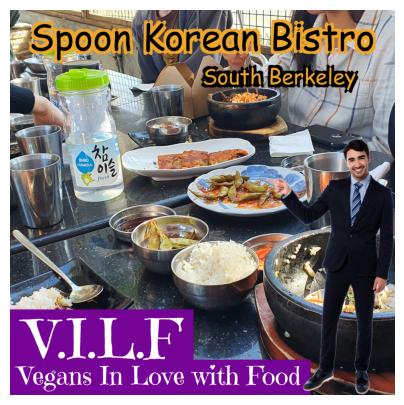

In [264]:
image_copy = image_copy.convert("RGBA")
thumbs_up_image = Image.open(f"{place['taste_label_short']}.png").convert("RGBA")
thumbs_up_image = thumbs_up_image.crop(thumbs_up_image.getbbox())

resize_proportion = (image_copy.size[0] // (3/2)) / thumbs_up_image.size[1]
new_width, new_height = int(resize_proportion*thumbs_up_image.size[0]), int(resize_proportion*thumbs_up_image.size[1])

thumbs_up_image = thumbs_up_image.resize((new_width,new_height))

image_copy.paste(thumbs_up_image,(image_copy.size[0] - thumbs_up_image.size[0],image_copy.size[1] - thumbs_up_image.size[1]), thumbs_up_image)

plot_img(image_copy)


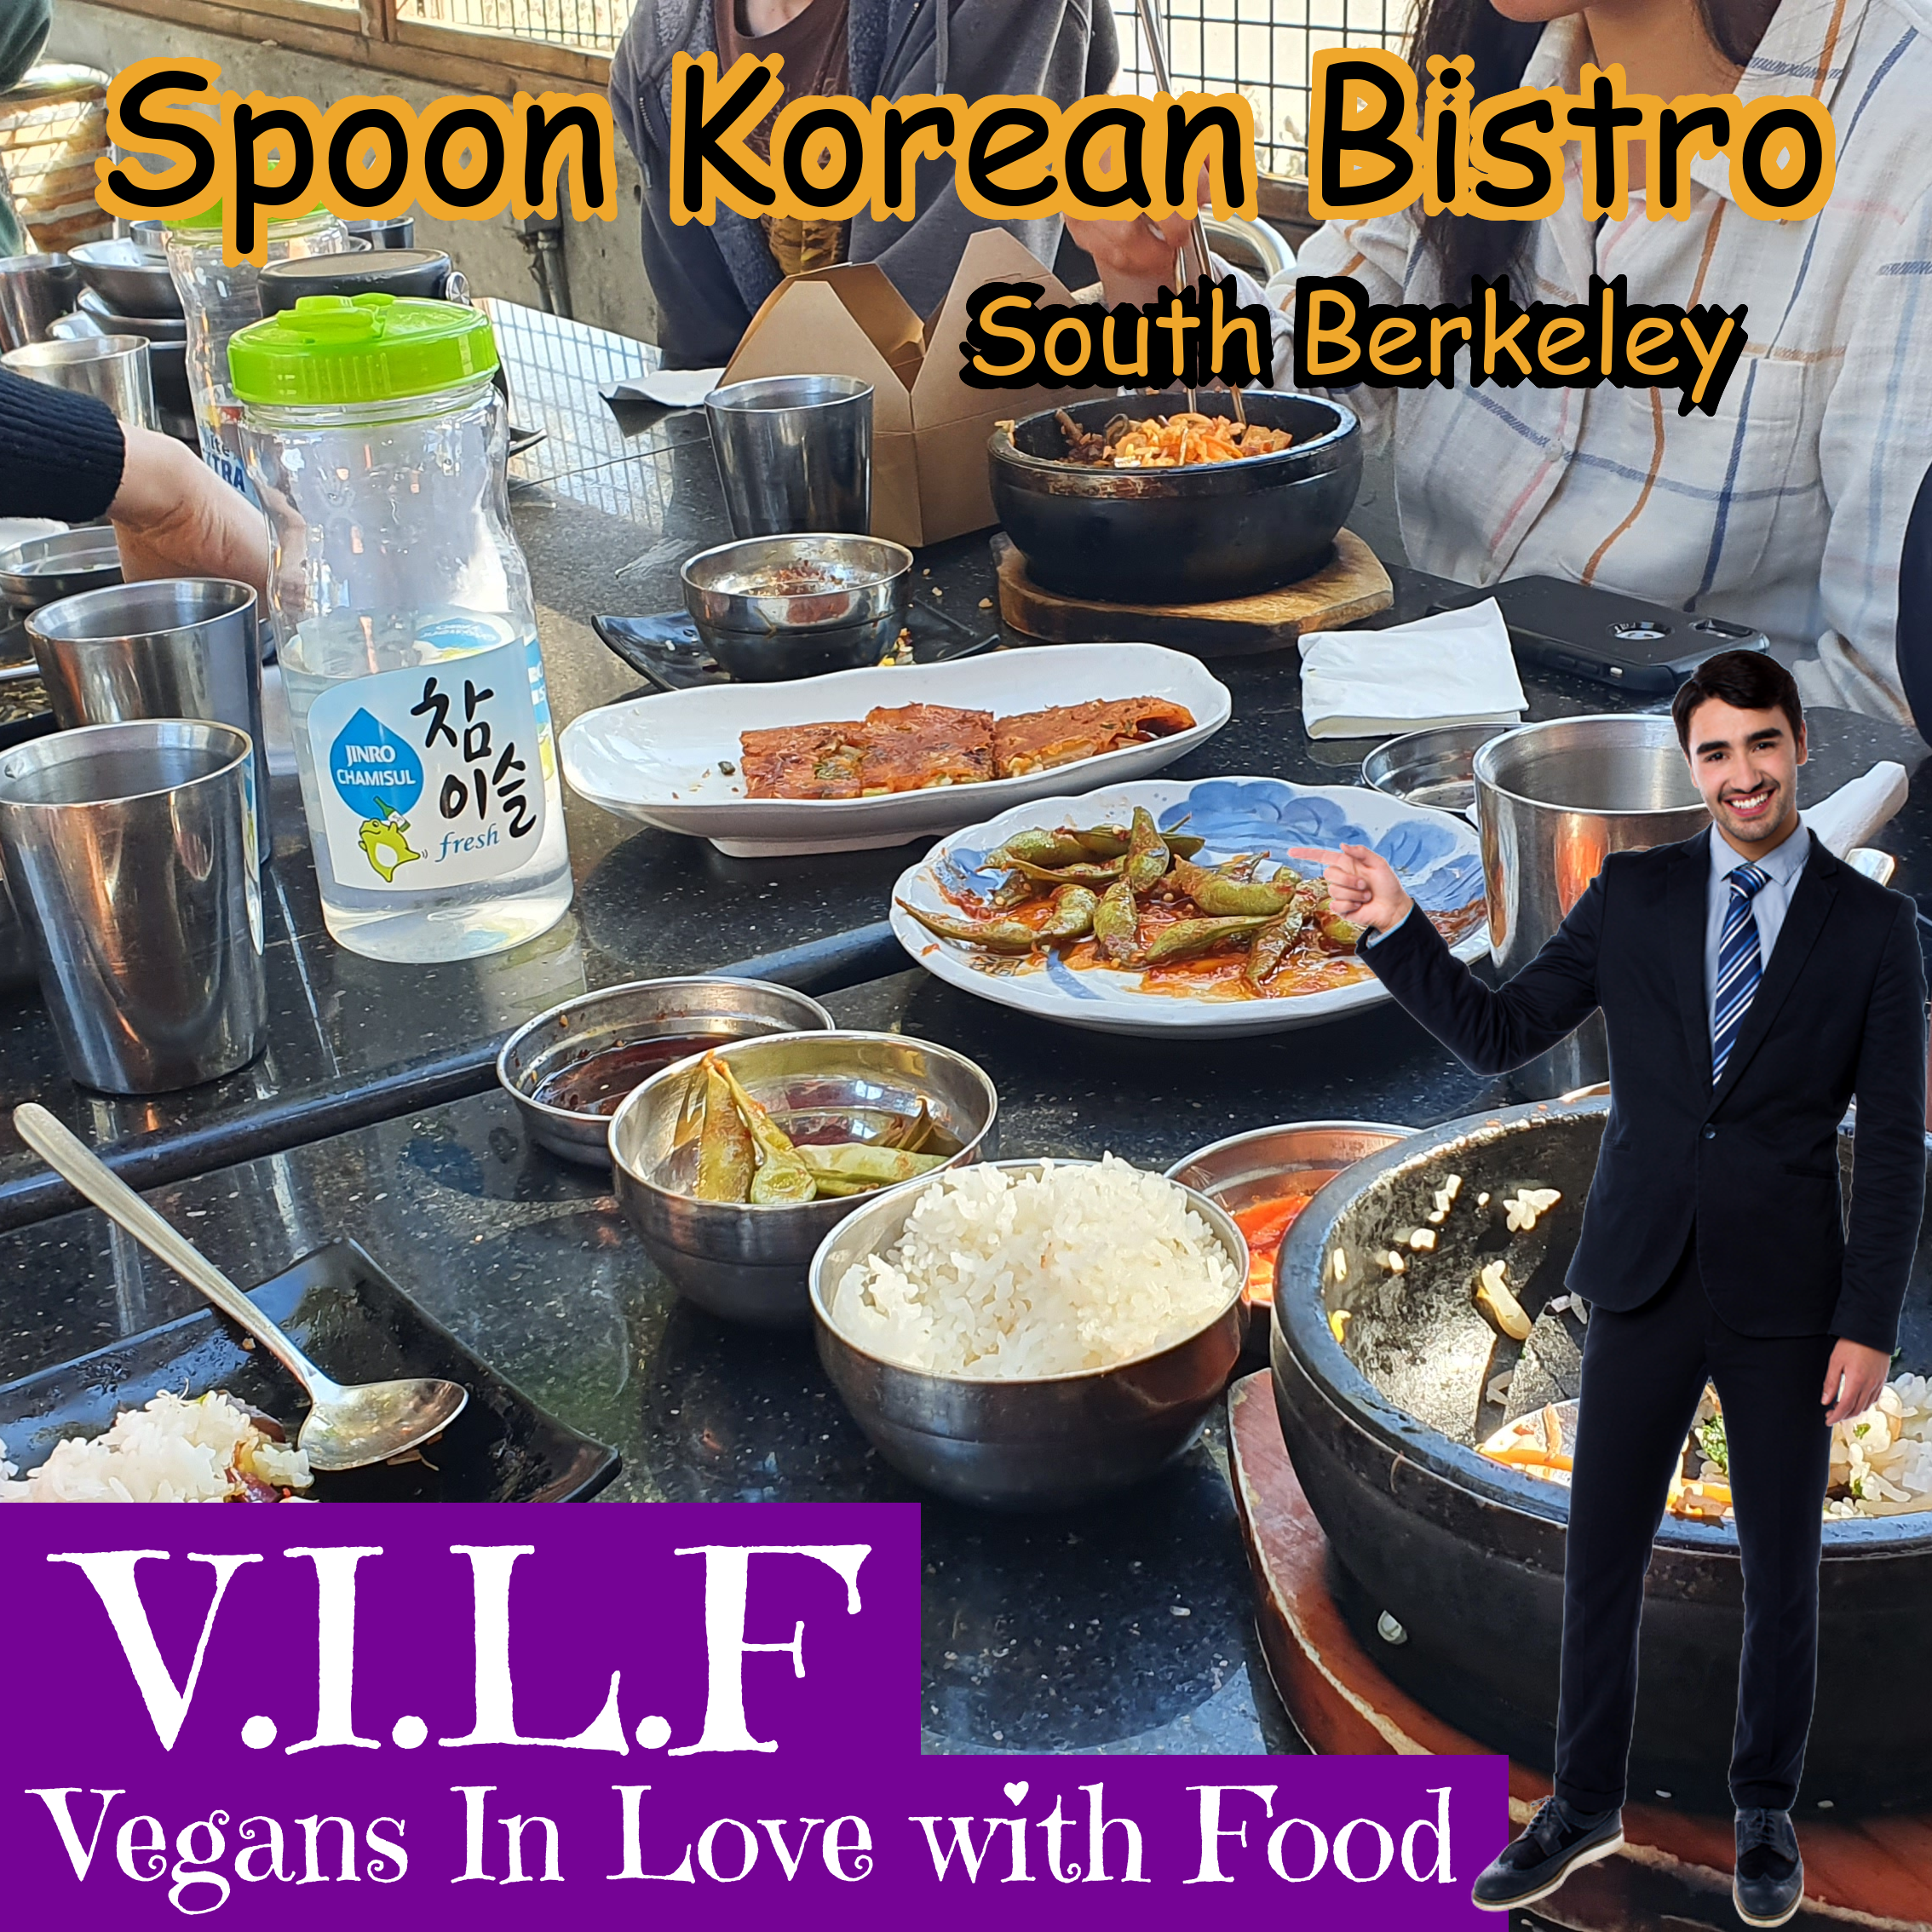

In [265]:
image_copy